In [3]:
import pandas as pd

df = pd.read_csv('Synthetic_Financial_datasets_log.csv')

df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


Dataset Structure
-----------------

*   step: Represents a unit of time in the real world, with 1 step equating to 1 hour. The total simulation spans 744 steps, equivalent to 30 days.
    
*   type: Transaction types include CASH-IN, CASH-OUT, DEBIT, PAYMENT, and TRANSFER.
    
*   amount: The transaction amount in the local currency.
    
*   nameOrig: The customer initiating the transaction.
    
*   oldbalanceOrg: The initial balance before the transaction.
    
*   newbalanceOrig: The new balance after the transaction.
    
*   nameDest: The transaction's recipient customer.
    
*   oldbalanceDest: The initial recipient's balance before the transaction. Not applicable for customers identified by 'M' (Merchants).
    
*   newbalanceDest: The new recipient's balance after the transaction. Not applicable for 'M' (Merchants).
    
*   isFraud: Identifies transactions conducted by fraudulent agents aiming to deplete customer accounts through transfers and cash-outs.
    
*   isFlaggedFraud: Flags large-scale, unauthorized transfers between accounts, with any single transaction exceeding 200,000 being considered illegal.

In [5]:
df.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [ ]:
# df['step'].unique()
# len(df) 6.3m
# df['type'].unique()

## Basically, the amount is withdraw amount and if subtraction of oldbalnaceOrg and newblanaceOrig is not equal to amount, it's flagged as isFraud

len(df.loc[df['isFraud'] == 1])
# There are total 8213 fraud case

df.loc[df['isFraud'] == 1]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.00,0.00,1,0
251,1,TRANSFER,2806.00,C1420196421,2806.00,0.0,C972765878,0.00,0.00,1,0
252,1,CASH_OUT,2806.00,C2101527076,2806.00,0.0,C1007251739,26202.00,0.00,1,0
680,1,TRANSFER,20128.00,C137533655,20128.00,0.0,C1848415041,0.00,0.00,1,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0


## After reviews, I made a wrong analysis. Column 'isFraud' is not flagged by the amount calculated between the oldbalance and the newbalance. 
- This dataset is meant to be analysed by ML model utilization.
- However, I am going to use Seaborn library to visualize some of meangful insights from given dataset.

In [22]:
# This tells me that newbalnceOrig - oldblanceOrg == amount means isFraud.
df.loc[df['oldbalanceOrg'] - df['amount'] != df['newbalanceOrig']]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0
10,1,DEBIT,9644.94,C1900366749,4465.00,0.00,C997608398,10845.0,157982.12,0,0
13,1,PAYMENT,11633.76,C1716932897,10127.00,0.00,M801569151,0.0,0.00,0,0
15,1,CASH_OUT,229133.94,C905080434,15325.00,0.00,C476402209,5083.0,51513.44,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362462,730,TRANSFER,7316255.05,C1869569059,17316255.05,17316255.05,C1861208726,0.0,0.00,1,1
6362506,734,TRANSFER,10000000.00,C1891630790,11810044.85,1810044.85,C2124431731,0.0,0.00,1,0
6362528,736,TRANSFER,10000000.00,C412961249,11314660.84,1314660.84,C253674970,0.0,0.00,1,0
6362582,741,TRANSFER,10000000.00,C1945606464,15674547.89,5674547.89,C625944676,0.0,0.00,1,0


In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

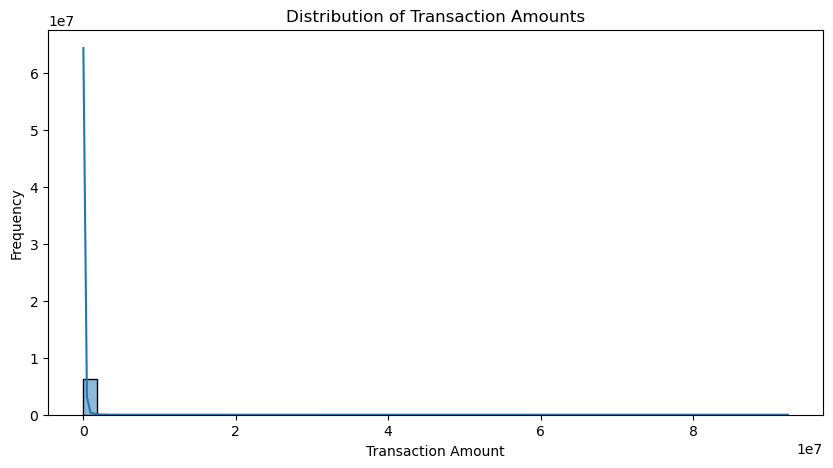

In [26]:
plt.figure(figsize=(10, 5))
sns.histplot(df['amount'], bins=50, kde=True)
plt.xlabel("Transaction Amount")
plt.ylabel("Frequency")
plt.title("Distribution of Transaction Amounts")
plt.show()

/tmp/ipykernel_5074/2951504445.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['isFraud'], palette=["blue", "red"])


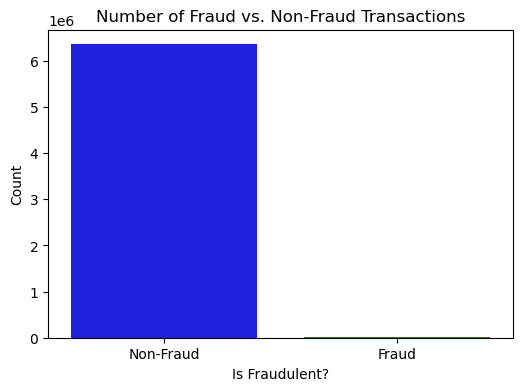

In [27]:
plt.figure(figsize=(6, 4))
sns.countplot(x=df['isFraud'], palette=["blue", "red"])
plt.xlabel("Is Fraudulent?")
plt.ylabel("Count")
plt.title("Number of Fraud vs. Non-Fraud Transactions")
plt.xticks([0, 1], ["Non-Fraud", "Fraud"])
plt.show()

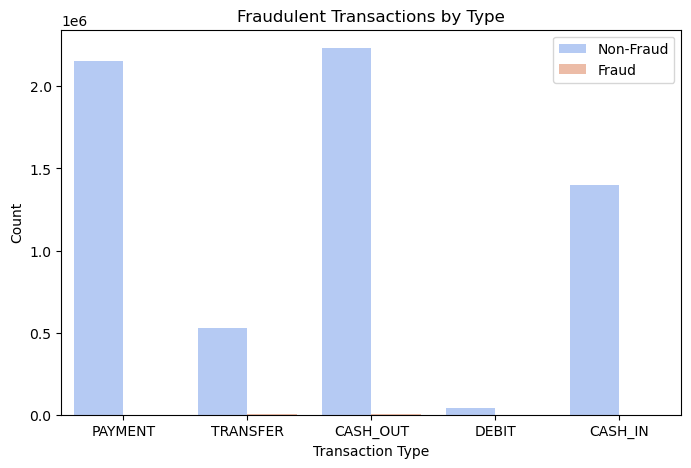

In [28]:
plt.figure(figsize=(8, 5))
sns.countplot(x=df['type'], hue=df['isFraud'], palette="coolwarm")
plt.xlabel("Transaction Type")
plt.ylabel("Count")
plt.title("Fraudulent Transactions by Type")
plt.legend(["Non-Fraud", "Fraud"])
plt.show()